## Sea Level Predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

#### Draw Plot:

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

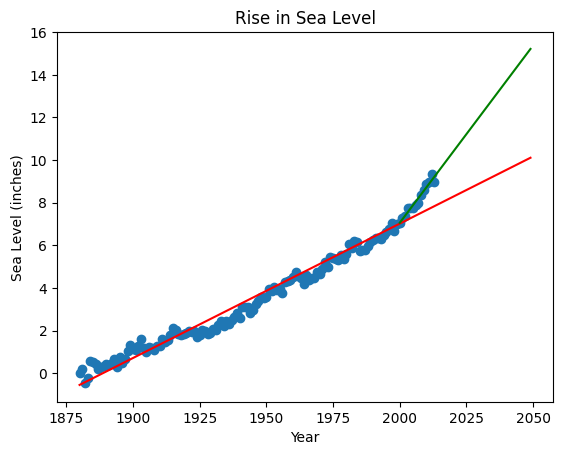

In [3]:
def draw_plot():
    df = pd.read_csv('data/epa-sea-level.csv')
    y = df['CSIRO Adjusted Sea Level']
    x = df['Year']
    
    fig, ax = plt.subplots()
    plt.scatter(x, y)
    
    res = linregress(x, y)
    x_pred = pd.Series([i for i in range(1880, 2051)])
    y_pred = res.slope * x_pred + res.intercept
    plt.plot(x_pred, y_pred, 'r')
    
    new_df = df.loc[df['Year'] >= 2000]
    new_x = new_df['Year']
    new_y = new_df['CSIRO Adjusted Sea Level']
    res_2 = linregress(new_x, new_y)
    x_pred2 = pd.Series([i for i in range(2000, 2051)])
    y_pred2 = res_2.slope * x_pred2 + res_2.intercept
    plt.plot(x_pred2, y_pred2, 'green')
    
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    ax.set_title('Rise in Sea Level')
    
    plt.savefig('data/sea-level-plot.png')
    return plt.gca()

draw_plot()